Your Name and PRN:
- Name : Kunal Kurve
- PRN  : 240340128012
- Date : 21/05/2024

# Image Processing with Neural Network

## Assignment: A03
### Take Neural Network implementation with:
- One hidden layer 
- ${Tanh}$ activation function


### Assignment - Answer all Questions
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|...|...|...|...|...|...|
|n|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

## Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections.abc import Callable
from typing import Literal

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

%matplotlib inline

## Setup Global Parameters

In [3]:
###-----------------------
### Basic hyper-parameters
###-----------------------

inpDir = '../input' # set input path as per your system
outDir = '../output' # set output path as per your system

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 10000 # number of epochs
NUM_SAMPLES = 1000 # How many samples we want to generate 
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [4]:
# make_moon is a in-built library which generates two class classification dataset

X, y = datasets.make_moons(n_samples=NUM_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [5]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [8]:
# what labels are present?
data_df.target.unique()

array([0, 1])

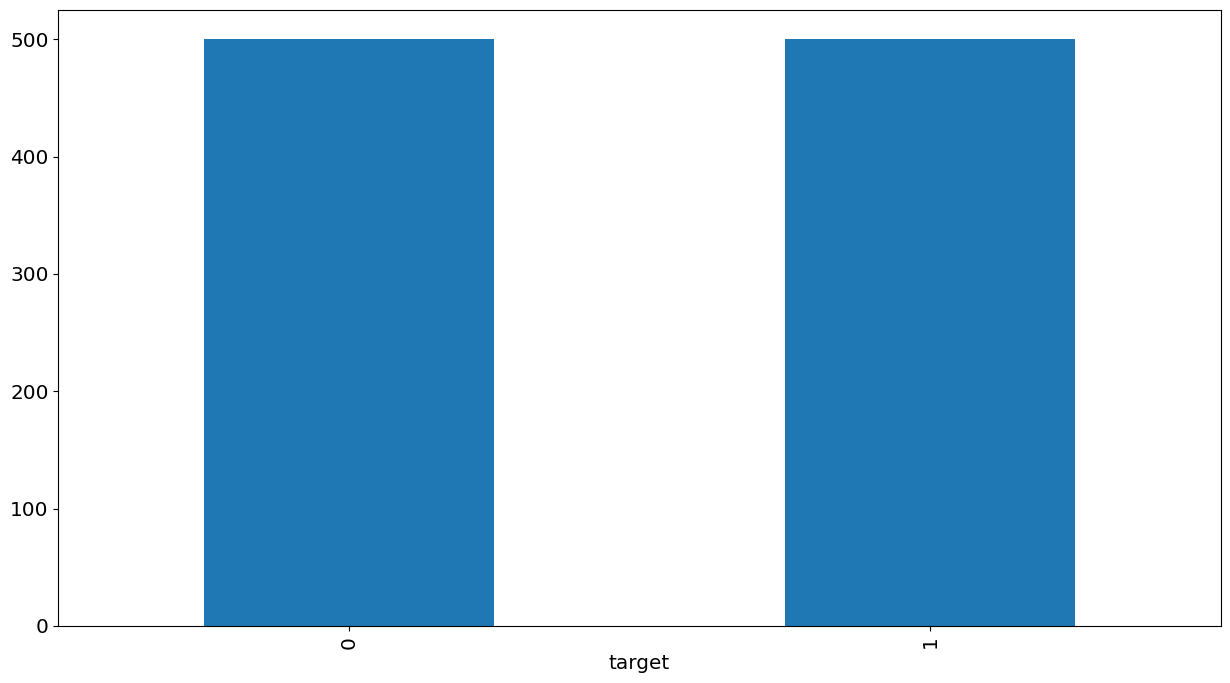

In [9]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

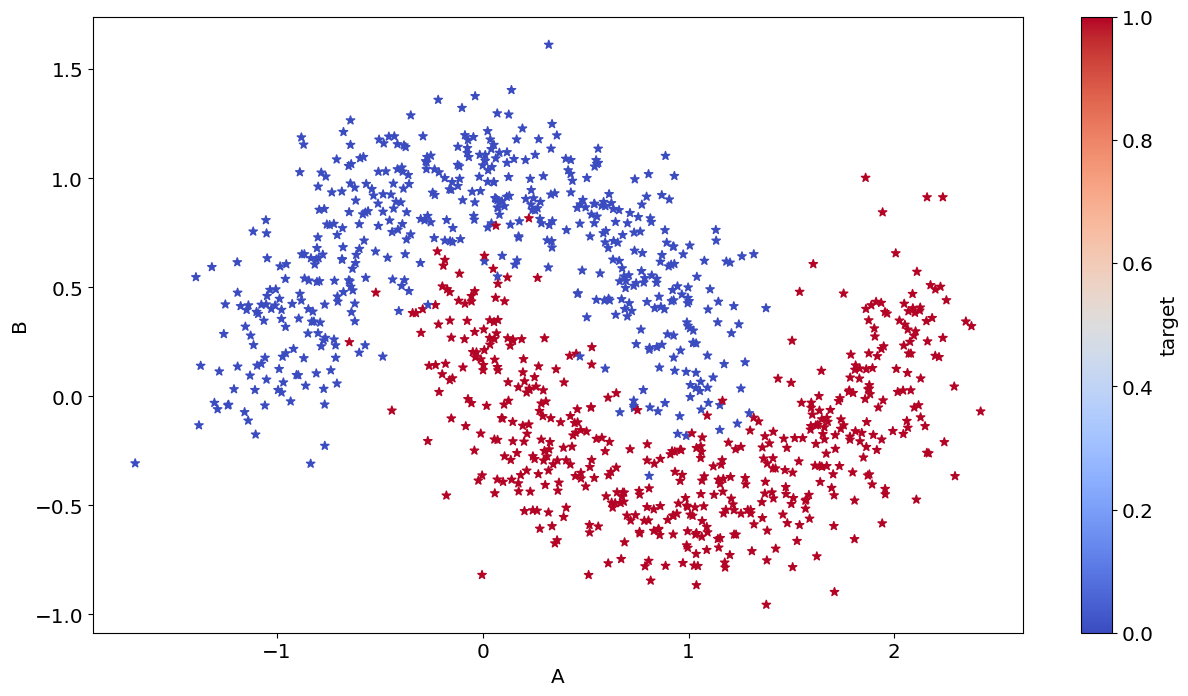

In [10]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot (x=A, y=B)
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

##  Preprocessing Data

In [11]:
y = pd.get_dummies(y).to_numpy()  ### Converting y to one hot encoded data for multiclass
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = TEST_SIZE, 
                                                    random_state=RANDOM_STATE)


In [ ]:
'''y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)'''

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800, 2), (200, 2), (200, 2))

In [14]:
type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

## Activation Function

In [15]:
''' def fn_sigmoid(z):

    Args: 
        z : a matrix of z values of shape(m, n_output)
    returns:
        sigmoid values of z

    return 1.0/(1.0 + np.exp(-z))
'''

' def fn_sigmoid(z):\n\n    Args: \n        z : a matrix of z values of shape(m, n_output)\n    returns:\n        sigmoid values of z\n\n    return 1.0/(1.0 + np.exp(-z))\n'

In [16]:
def fn_softmax(z):
    '''
    Args: 
        z : a matrix of z values of shape(m, n_output)
    returns:
        softmax values of z
    '''
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z, axis=1, keepdims=True)

In [17]:
def fn_activ(z): # g(z)
    return np.tanh(z)

def fn_activ_prime(a): # g'(z)
    return 1. - np.tanh(a)**2

## Model Building

In [18]:
def predict(model, X_p):
    
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    
    # Forward Propagation
        
    # Layer - 1
    
    z1 = X_p.dot(W1) + b1 # Aggregation Function
    a1 = fn_activ(z1) # Activation Function
    
    # Layer - 2
    
    z2 = a1.dot(W2) + b2 # Aggregation Function
    a2 = fn_softmax(z2) # Activation Function
        
    return np.argmax(a2,axis=1) # Is it greater or equal to 0.5  

In [19]:
def calculate_loss(model, X_l, y_l):
    
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    
    m = X_l.shape[0]

    ### Forward Propagation
    # Layer - 1
    
    z1 = X_l.dot(W1) + b1 # Aggregation Function
    a1 = fn_activ(z1) # Activation Function
    
    # Layer - 2
    
    z2 = a1.dot(W2) + b2 # Aggregation Function
    a2 = fn_softmax(z2) # Activation Function
    
    data_loss = -(y_l*np.log(a2)+(1-y_l)*np.log(1-a2)).sum() # Binary 
        
    return data_loss / m    # devided by no. of samples

# Stochastic Gradient Descent

In [20]:
loss_hist = {}

In [35]:
# No. of features is fixed, Hence Input shape is Fixed
# No. of Output is fixed, Hence Output shape is Fixed

def build_model(X_train, y_train, nn_out, nn_hdim, alpha,epochs=EPOCHS):
    
    '''
    Args: 
    
        'X_train':Training features, 
        'y_train':Training labels, 
        'nn_out':Size of Output,
        'nn_hdim':No. of nodes in hidden layer
    '''
    m, nn_input_dim = X_train.shape
    nn_output_dim = nn_out
    
    # W1 = rng.random((nn_input_dim,nn_hdim), 
    #          dtype=np.float32) / np.sqrt(nn_input_dim)  # This line will be explained after 2-3 lectures, Today's Dt. 16/05/24 
    
    # W2 = rng.random((nn_hdim, nn_output_dim), 
    #          dtype=np.float32) / np.sqrt(nn_hdim)

    ### size = 2,4
    W1 =  np.random.rand(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)

    ### size = 4,2
    W2 =  np.random.rand(nn_hdim,nn_out)/np.sqrt(nn_hdim)
    
    ### size = 4
    b1 = np.zeros((1, nn_hdim), dtype=np.float32)

    ### size = 2
    b2 = np.zeros((1, nn_out), dtype=np.float32)
    
    curr_loss = 0
    loss,epoch = [], []
    
    for i in range(0, epochs):
        
        # Forward Propagation
        
        # Layer - 1
        
        Z1 = X_train.dot(W1) + b1
        a1 = fn_activ(Z1)
        
        # Layer - 2
        
        Z2 = a1.dot(W2) + b2
        a2 = fn_softmax(Z2)
        
        # Backward Propagation
        
        assert (a2.shape == y_train.shape), f'check y{a2.shape}/{y_train.shape}'
        dz2 = a2-y_train  ##### remember dim of a2 and y to be same

        dw2 = (a1.T).dot(dz2)
        assert (W2.shape == dw2.shape), f'check w2 {W2.shape}/{dw2.shape}'

        db2 = np.sum(dz2,axis=0, keepdims = True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'
        
        # Layer - 1
        
        dz1 = da1 * fn_activ_prime(Z1)
        assert (Z1.shape == dz1.shape), f'check Z1 {z1.shape}/{dz1.shape}' 

        dw1 = (X_train.T).dot(dz1)
        assert (W1.shape == dw1.shape), f'check w1 {W1.shape}/{dw1.shape}'

        db1 = np.sum(dz1,axis=0, keepdims = True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'
        
        # Gradient Update
        
        W1 += -alpha * dw1 / m
        b1 += -alpha * db1 / m
        
        W2 += -alpha * dw2 / m
        b2 += -alpha * db2 / m
        
        model = {'W1':W1, 'b1':b1, 
                 'W2':W2, 'b2':b2}
    
        curr_loss = calculate_loss(model , X_train, y_train)
        loss.append(curr_loss)
        
        epoch.append(i)
        
        if i%100 == 0:
            print(f'After epochs:{i:3d}; loss: {curr_loss: .5f}')
    
    loss_hist['epoch']= epoch
    loss_hist['loss']= loss
    
    return model

## Training Model

In [36]:
nn_out_dim = 2
nn_hdim = [1,2,3,4,5]
ALPHA = [0.05, 0.1, 0.15, 0.2, 0.25]  # learning rate

In [37]:
model = build_model(X_train,y_train, nn_out_dim, nn_hdim[4], ALPHA[4])

After epochs:  0; loss:  1.40129
After epochs:100; loss:  0.60968
After epochs:200; loss:  0.60258
After epochs:300; loss:  0.58492
After epochs:400; loss:  0.52602
After epochs:500; loss:  0.43898
After epochs:600; loss:  0.37051
After epochs:700; loss:  0.32448
After epochs:800; loss:  0.29291
After epochs:900; loss:  0.26995
After epochs:1000; loss:  0.25203
After epochs:1100; loss:  0.23693
After epochs:1200; loss:  0.22357
After epochs:1300; loss:  0.21186
After epochs:1400; loss:  0.20189
After epochs:1500; loss:  0.19358
After epochs:1600; loss:  0.18670
After epochs:1700; loss:  0.18102
After epochs:1800; loss:  0.17633
After epochs:1900; loss:  0.17244
After epochs:2000; loss:  0.16920
After epochs:2100; loss:  0.16649
After epochs:2200; loss:  0.16418
After epochs:2300; loss:  0.16221
After epochs:2400; loss:  0.16049
After epochs:2500; loss:  0.15898
After epochs:2600; loss:  0.15764
After epochs:2700; loss:  0.15644
After epochs:2800; loss:  0.15535
After epochs:2900; loss:

<Axes: xlabel='epoch'>

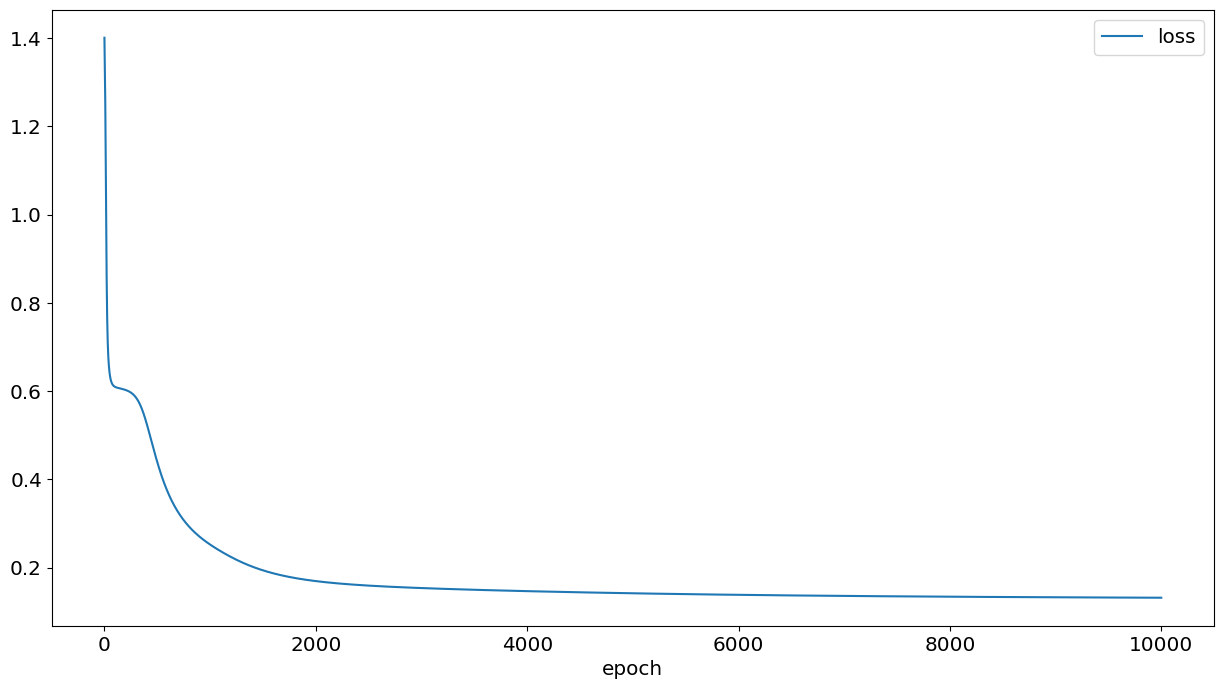

In [38]:
pd.DataFrame(loss_hist).plot(x = 'epoch')

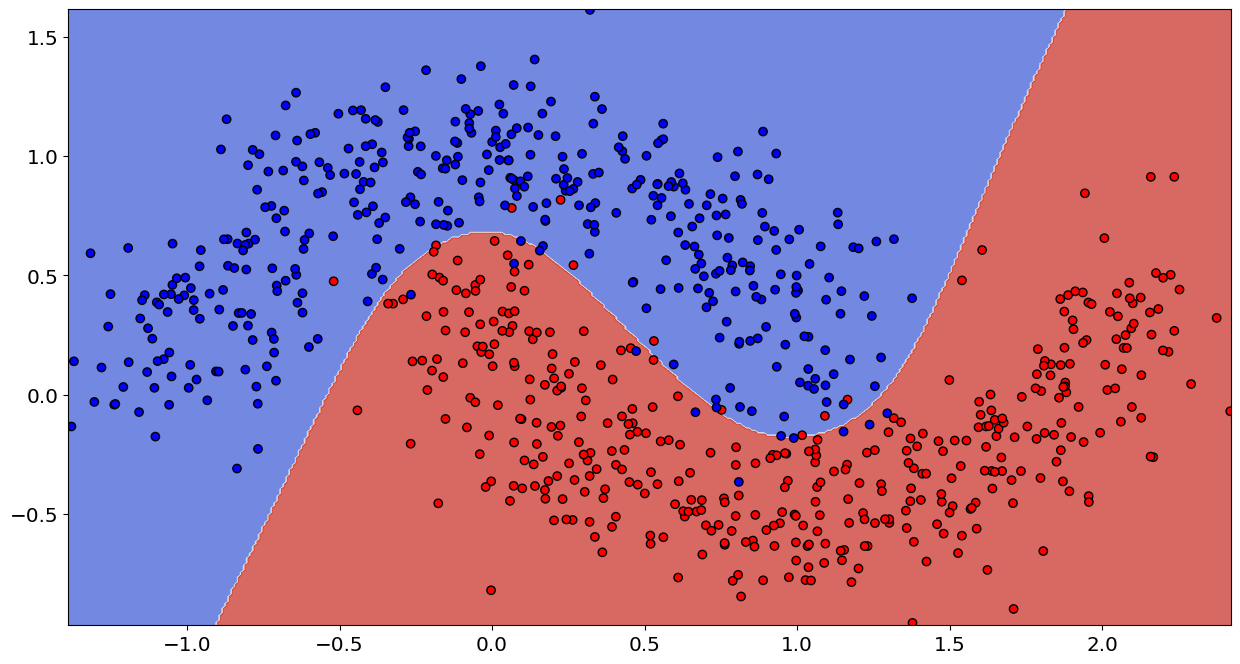

In [39]:
fig,ax = plt.subplots() ### instatiation of plt object
dm = 0.01 ## spacing of grid
x_min, x_max = X_train[:,0].min()-dm, X_train[:,0].max()+dm
y_min, y_max = X_train[:,1].min()-dm, X_train[:,1].max()+dm

xx,yy = np.meshgrid(np.arange(x_min, x_max,dm), np.arange(y_min, y_max,dm))  #### generate mesh

XX = np.c_[xx.ravel(),yy.ravel()] ### prepare feature data

y_pred = predict(model, XX)
Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,Z,cmap = CMAP, alpha = 0.8)
ax.scatter(X_train[:,0],X_train[:,1],c = y_train.argmax(axis=1),edgecolors = 'k',cmap = plt.cm.bwr);

## Check Accuracy, loss and cf for train and test

Train

In [49]:
y_pred_train = predict(model, X_train)

print("Accuracy Score for Train:",accuracy_score (y_train.argmax(axis=1), y_pred_train))
print("Loss for Train:",calculate_loss(model, X_train, y_train))

cm1 = confusion_matrix(y_train.argmax(axis=1),y_pred_train)
print("Confusion Matrix for Train:")
cm1

Accuracy Score for Train: 0.97375
Loss for Train: 0.13152161781292704
Confusion Matrix for Train:


array([[389,  11],
       [ 10, 390]])

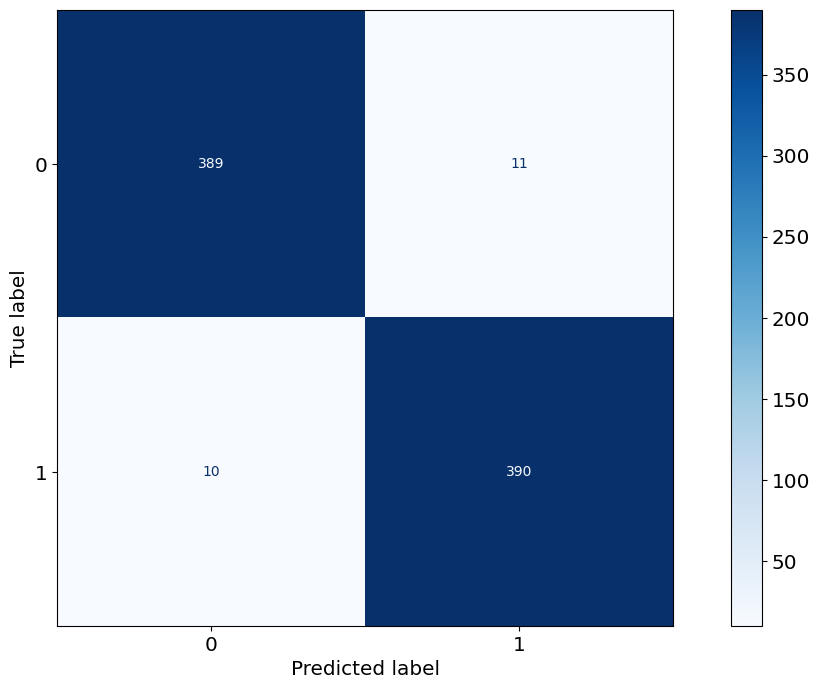

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = [0,1])

fig, ax = plt.subplots()

disp.plot(ax=ax, cmap='Blues')

ax.grid(False)

Test

In [46]:
y_pred_test = predict(model, X_test)

print("Accuracy Score for Test:",accuracy_score (y_test.argmax(axis=1), y_pred_test))
print("Loss for Test:",calculate_loss(model, X_test, y_test))

cm2 = confusion_matrix(y_test.argmax(axis=1),y_pred_test)
print("Confusion Matrix for Test:")
cm2

Accuracy Score for Test: 0.985
Loss for Test: 0.10751897197224021
Confusion Matrix for Test:


array([[99,  1],
       [ 2, 98]])

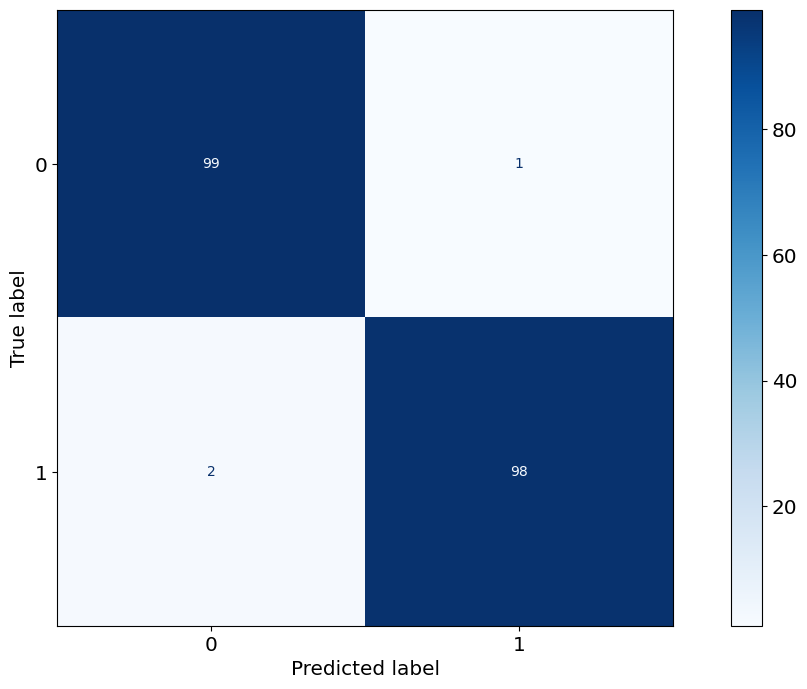

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = [0,1])

fig, ax = plt.subplots()

disp.plot(ax=ax, cmap='Blues')

ax.grid(False)

## Questions

Q1. Is this model more accurate compared to previous model?

Yes. For learning rate 0.1, number 10000 and number of nodes in hidden layer 1, the training accuracy and testing accuracy are observed to be significantly more for multi-class prediction (0.97375 > 0.8666666666666667, 0.985>0.9 respectively).

Q2. Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

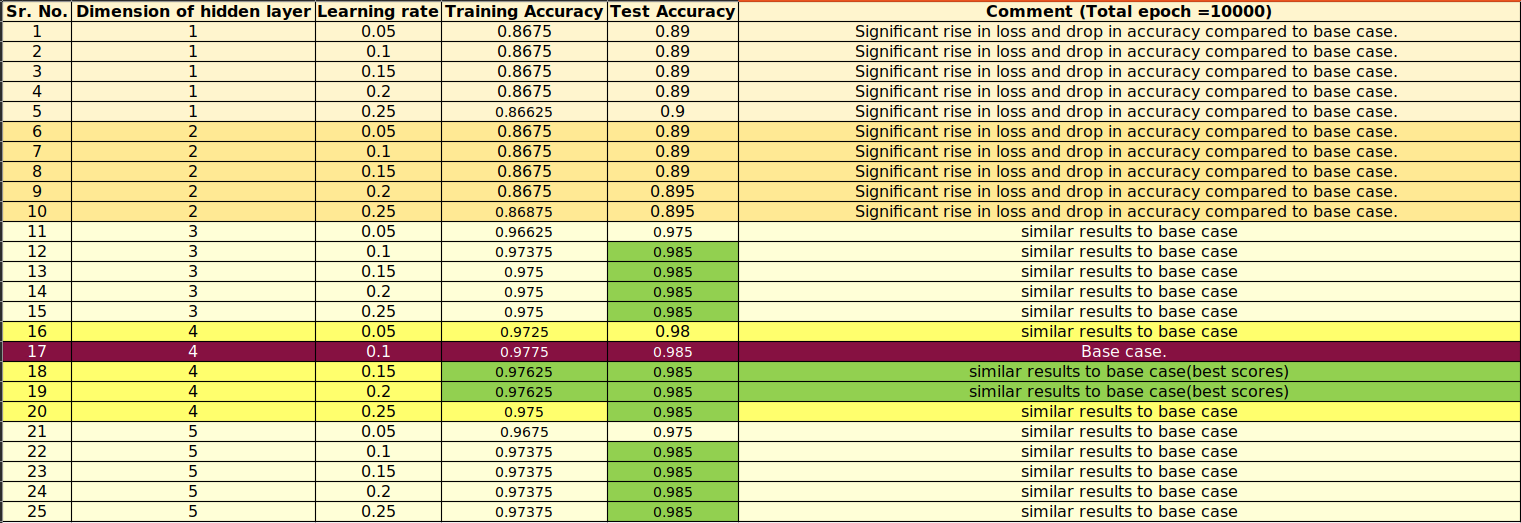

Q3. What lines will you change to convert it into multi-class prediction model?

chages are - 
1. The output layers activation function is changed from sigmoid to softmax. The label for prediction is not threshold based but given by class with maximum probability given by softmax function.
2. The labels required for multiclass prediction in onehotencoded format.
3. The reshaping of labels to matrix is not required specifically as onehotencoding gives matrix. 
4. Normally distributed randomly generated weights are not learning fast enough hence, weights  are randomly initiated.

Q4. How many epochs are sufficient?

From the table above, it can be concluded that there are 2 drops in losses. And for many combinations of learning rate and number of nodes in hidden layer, only one drop is observed for 1000 epochs and decision boundary is almost linear. Hence it can be concluded that the model has not completed learning, which was conformed by increasing no of epochs. For the combinations where the second drop in loss was observed with a polynomial decision boundary, the loss was observed to be stabalized for varying numbers of epoch from 600 to 10000. From table it can be deducted that as learning rate increases, the number of epochs sufficient decreases. The number of epochs sufficient also depends on the number of nodes in hidden layer.